# ![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white) **CHAPTER 4 - TRAINING LINEAR MODELS**

---

## **SETUP:**

In [1]:
# This notebook requires Python 3.7 or above and Scikit-Learn 1.0.1 or above.
import sys
from packaging import version
import sklearn

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
# Common libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Default settings for matplotlib.
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

In [3]:
# Create directory for matplotlib images.
from pathlib import Path

IMAGES_PATH = Path("images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)  # If directory exists, do nothing.

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, facecolor="w"):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, facecolor="w")

---

## **LINEAR REGRESSION:**

### **1. NORMAL EQUATION:**

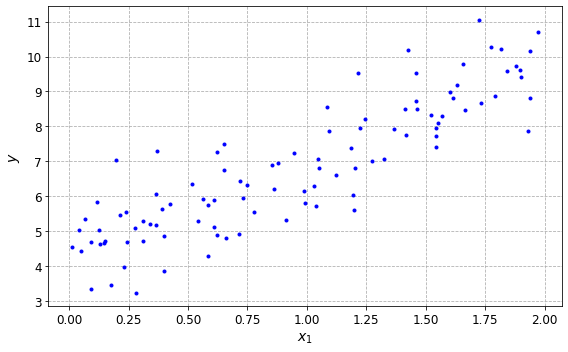

In [4]:
# Let's generate some linear and noisy dataset.
np.random.seed(42)  # Make this cell reproducible.
m = 100  # Instances.
X = 2 * np.random.rand(m, 1)  # Column vector required by sklearn.
y = 4 + 3 * X + np.random.randn(m, 1) # 3x + 4 + gaussian noise.

plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.grid(linestyle="dashed")
save_fig("generated_data_plot")
plt.show()

In [5]:
# Implement the normal equation by hand.
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # Add x0 = 1 to each feature.
# The normal equation.
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # The `@` means dot product.
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
# Predict values for new samples.
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
X_new_b, y_predict

(array([[1., 0.],
        [1., 2.]]),
 array([[4.21509616],
        [9.75532293]]))

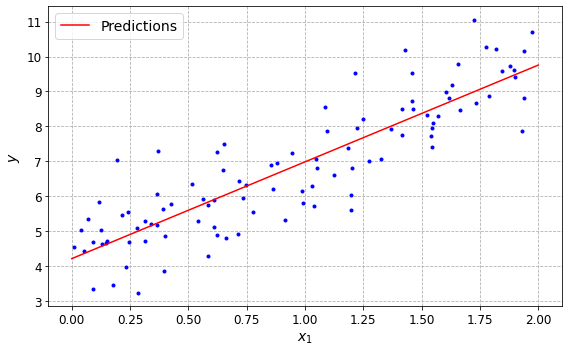

In [7]:
# How looks a model implemented by the normal equation?
plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.grid(linestyle="dashed")
plt.legend(loc="upper left")
save_fig("generated_data_plot")
plt.show()

In [8]:
# LinearRegression with Scikit-Learn.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

---

## **GRADIENT DESCENT:**

### **1. BATCH GRADIENT DESCENT:**

In [10]:
# Implement batch gradient descent algorithm by hand.
np.random.seed(42)
eta = 0.1  # Learning rate.
m = len(X_b)  # Instances.
n_epochs = 1000
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    
theta  # Trained model parameters.

array([[4.21509616],
       [2.77011339]])

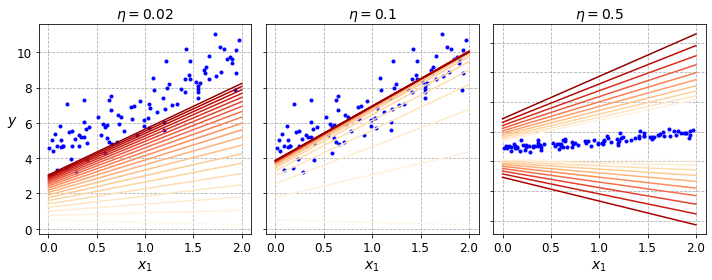

In [11]:
np.random.seed(42)
theta = np.random.randn(2, 1)

def plot_gradient_descent(theta, eta):
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown))  # type: ignore
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$")
    plt.grid(linestyle="dashed")
    plt.title(fr"$\eta = {eta}$")

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plot_gradient_descent(theta, eta=0.02)  # Slow converge.
plt.ylabel("$y$", rotation=0)
plt.subplot(1, 3, 2)
plot_gradient_descent(theta, eta=0.1)  # Quick converge.
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(1, 3, 3)
plot_gradient_descent(theta, eta=0.5)  # Divergent.
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("gradient_descent_plot")
plt.show()


### **2. STOCHASTIC GRADIENT DESCENT:**

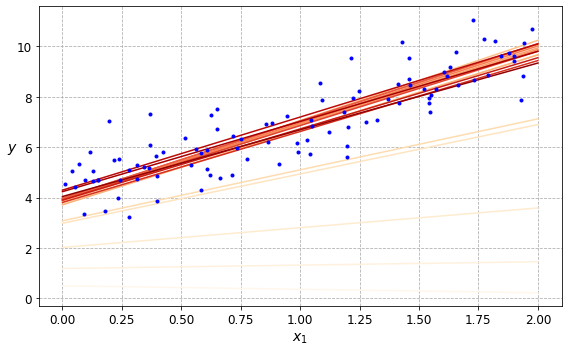

In [12]:
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
n_shown = 20
plt.figure(figsize=(8, 5))

for epoch in range(n_epochs):
    for iteration in range(m):
        
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]  # type: ignore
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # For SGD, we don't didive by m.
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(linestyle="dashed")
save_fig("sgd_plot")
plt.show()

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=42, max_iter=1000, tol=1e-5, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

---

## **POLYNOMIAL REGRESSION:**

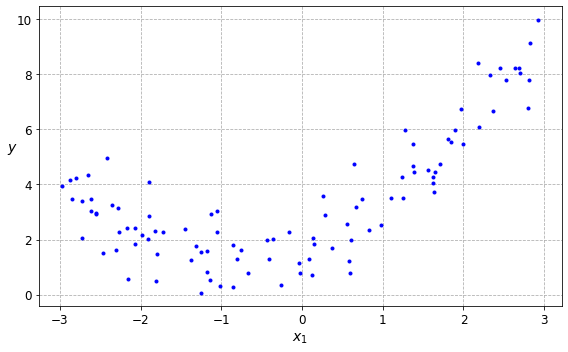

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(linestyle="dashed")
save_fig("quadratic_data")
plt.show()

In [16]:
# Add polynomial features to the dataset.
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [17]:
# In this way (having x^2 feature) we can train a linear model.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# y = ax^2 + bx + c
lin_reg.intercept_, lin_reg.coef_  # c, b, a

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

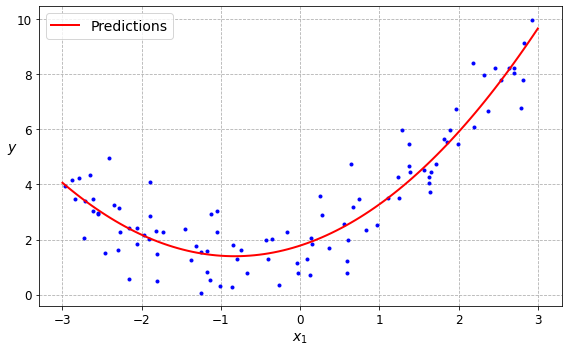

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(linestyle="dashed")
save_fig("quadratic_predicitions")
plt.show()

---

## **LEARNING CURVES:**

### **1. UNDERFITTED MODEL:**

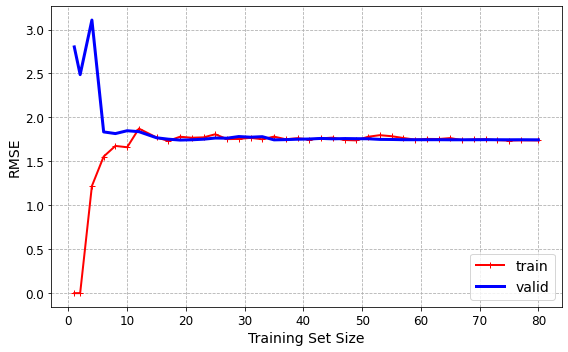

In [19]:
# Learning curve helps to say if the model is underfitted or overfitted.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores, *_ = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), 
    cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="lower right")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.grid(linestyle="dashed")
save_fig("underfitting_learning_curves_plot")
plt.show()

### **2. OVERFITTED MODEL:**

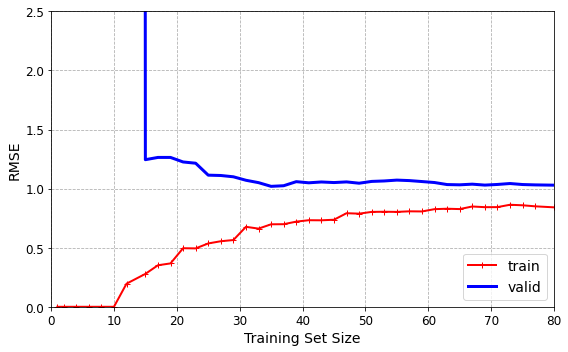

In [20]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores, *_ = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="lower right")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 2.5])
plt.grid(linestyle="dashed")
save_fig("overfitting_learning_curves_plot")
plt.show()


---

## **REGULARIZED LINEAR MODELS:**

### **1. RIDGE REGRESSION:**

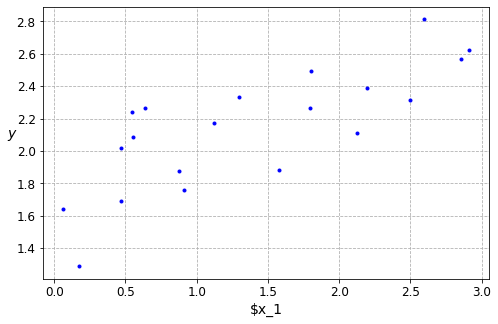

In [21]:
# Generate a noisy linear dataset.
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
X_new = np.linspace(0, 3, m).reshape(m, 1)
y = 1 + 0.5 * X + np.random.rand(m, 1)

plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1")
plt.ylabel("$y$", rotation=0)
plt.grid(linestyle="dashed")
plt.show()

In [22]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(random_state=42, alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[2.18097828]])

In [23]:
from sklearn.linear_model import SGDRegressor

# The "l2" means Ridge.
sgd_reg = SGDRegressor(random_state=42, alpha=0.1, penalty="l2", tol=0) 
sgd_reg.fit(X, y.ravel())  # The `fit()` method expects 1D targets.
sgd_reg.predict([[1.5]])

array([2.16303879])

[]

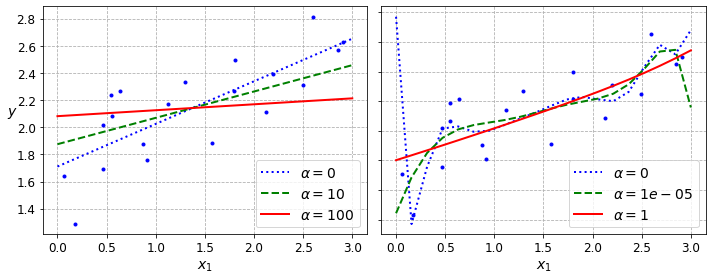

In [24]:
# Let's see plots for different models and alphas.
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=2)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X, y)
        y_new = model.predict(X_new)
        plt.plot(X_new, y_new, style, linewidth=2, label=fr"$\alpha = {alpha}$")
        plt.legend(loc="lower right")
        plt.xlabel("$x_1$")
        plt.grid(linestyle="dashed")
        
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(1, 2, 2)
plot_model(Ridge, polynomial=True, alphas=(0, 1e-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression")
plt.plot()

### **2. LASSO REGRESSION:**

In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42, alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([2.16554619])

In [26]:
from sklearn.linear_model import SGDRegressor

# The "l1" means Lasso.
sgd_reg = SGDRegressor(random_state=42, alpha=0.1, penalty="l1", tol=0) 
sgd_reg.fit(X, y.ravel())  # The `fit()` method expects 1D targets.
sgd_reg.predict([[1.5]])

array([2.13419802])

[]

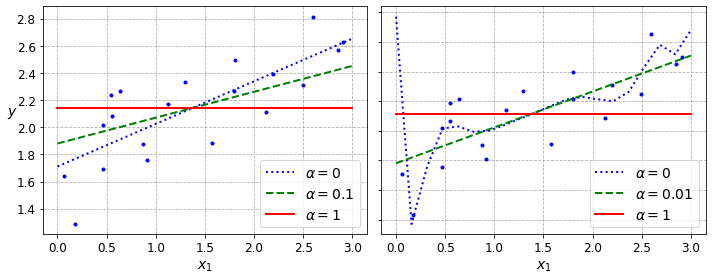

In [27]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0)
plt.subplot(1, 2, 2)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression")
plt.plot()

### **3. ELASTIC NET:**

In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=42, alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([2.17152273])

### **4. EARLY STOPPING:**

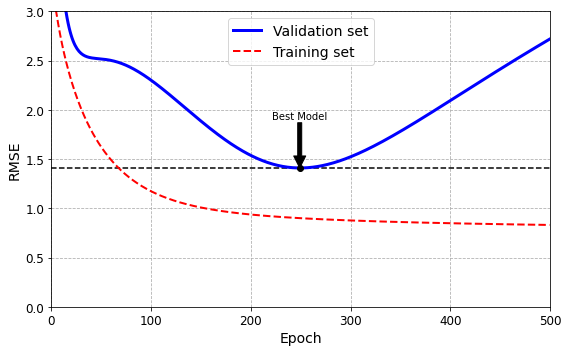

In [29]:
# The early stopping algorithm for a quadratic dataset.

from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate a quadratic dataset.
np.random.seed(42)
m = 100  # Instances.
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[:m // 2], y[:m // 2].ravel()
X_valid, y_valid = X[m // 2:], y[m // 2:].ravel()

# Prepare for SGD.
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

# Early stopping.
sgd_reg = SGDRegressor(random_state=42, penalty=None, eta0=0.002)  # type: ignore
train_errors, val_errors = [], []
best_valid_rmse = float("inf")
n_epochs = 500

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    val_errors.append(val_error)
    
    # Train error for the plot.
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    train_errors.append(train_error)


# Plot details.
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(8, 5))
plt.hlines(best_valid_rmse, 0, n_epochs, linestyles="dashed", color="black")
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.plot(best_epoch, best_valid_rmse, "ko")
plt.grid(linestyle="dashed")
plt.axis([0, n_epochs, 0, 3])
plt.legend(loc="upper center")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.annotate(
    "Best Model",
    xy=(float(best_epoch), best_valid_rmse),
    xytext=(float(best_epoch), best_valid_rmse + 0.5),
    ha="center",
    arrowprops=dict(facecolor="black"),
)
save_fig("early_stopping")
plt.show()

---

## **LOGISTIC REGRESSION:**

### **1. ESTIMATING PROBABILITIES:**

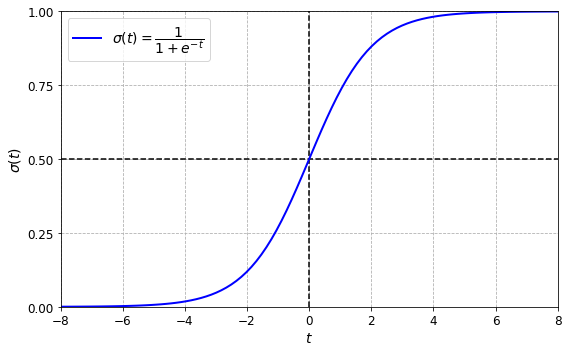

In [30]:
# Let's create a plot of the logistic function.
lim = 8
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 5))
plt.vlines(0, 0, 1, color="black", linestyle="dashed")
plt.hlines(0.5, -lim, lim, color="black", linestyle="dashed")
plt.plot(t, sig, "b-", linewidth=2, label = r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("$t$")
plt.ylabel(r"$\sigma(t)$")
plt.grid(linestyle="dashed")
plt.legend(loc="upper left")
plt.axis([-lim, lim, 0, 1])
plt.gca().set_yticks([0, 0.25, 0.50, 0.75, 1])
save_fig("logistic_function")
plt.show()

### **2. DECISION BOUNDARIES:**

In [31]:
# We will use the iris dataset to predict probabilites for one of the species.
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.keys()  # type: ignore

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
print(iris.DESCR)  # type:ignore

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
iris.data.head()  # type: ignore

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
iris.target.head()  # type: ignore

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [35]:
iris.target_names  # type: ignore

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values  # type: ignore
y = iris.target_names[iris.target] == "virginica"  # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

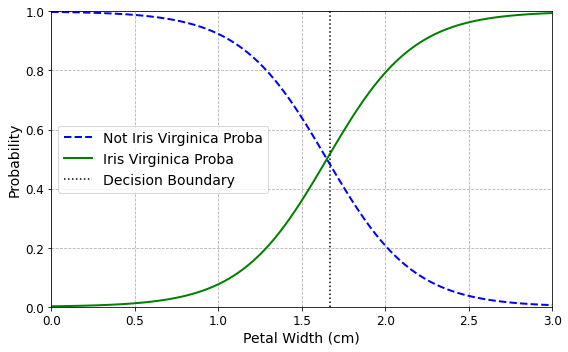

In [37]:
X_new = np.linspace(0, 3, 100).reshape(-1, 1)  # Column vector.
# First column - negative class, Second column - positive class.
y_proba = log_reg.predict_proba(X_new) 
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] 

plt.figure(figsize=(8, 5))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris Virginica Proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica Proba")
plt.vlines(decision_boundary, 0, 1, color="black", linestyle="dotted",
           label="Decision Boundary")
plt.grid(linestyle="dashed")
plt.axis([0, 3, 0, 1])
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
save_fig("logistic_regression")
plt.show()

In [38]:
decision_boundary

1.6666666666666667

In [39]:
log_reg.predict([[1.65], [1.67]])

array([False,  True])

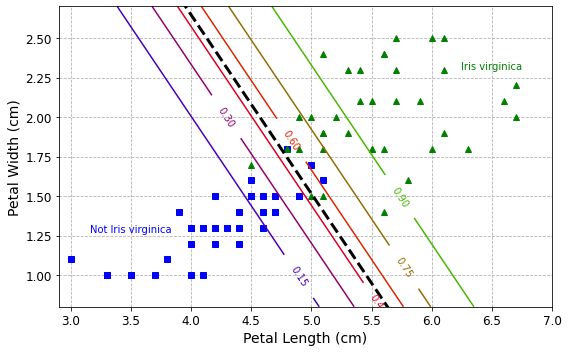

In [40]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # type: ignore
y = iris.target_names[iris.target] == "virginica"  # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42, C=2)
log_reg.fit(X_train, y_train)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 1000).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 1000).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0]) /  # type: ignore 
             log_reg.coef_[0, 1]) 

plt.figure(figsize=(8, 5))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")  # type: ignore
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")  # type: ignore
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)  # type: ignore
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid(linestyle="dashed")
save_fig("logistic_regression_contour_plot")
plt.show()



---

## **SOFTMAX REGRESSION:**

In [41]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # type: ignore
y = iris.target.values  # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(random_state=42, C=10, multi_class="multinomial")
softmax_reg.fit(X_train, y_train)
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]]).round(2)

(array([2]), array([[0.  , 0.08, 0.92]]))

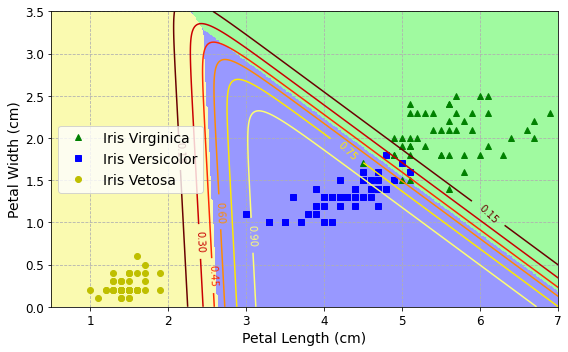

In [42]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])  # type: ignore
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(8, 5))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris Vetosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid(linestyle="dashed")
save_fig("softmax_regression_contour_plot")
plt.show()